In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# data import
df = pd.read_csv('C:/Users/mindt/OneDrive/Sweden/Study/DU/Business Intelligence/Machine learning/proejct/resub/booking_count_date.csv')
df

,date,city hotel,resort hotel
0,2015-07-01,65,38
1,2015-07-02,1,35
2,2015-07-03,10,27
3,2015-07-04,9,36
4,2015-07-06,1,40
...,...,...,...
783,2017-08-27,79,46
784,2017-08-28,106,41
785,2017-08-29,60,21
786,2017-08-30,34,28


C:\Users\mindt\AppData\Local\Temp/ipykernel_3212/1432391436.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  series = pd.DataFrame(data=x, index=pd.date_range(start=pd.datetime(2015, 7, 1),


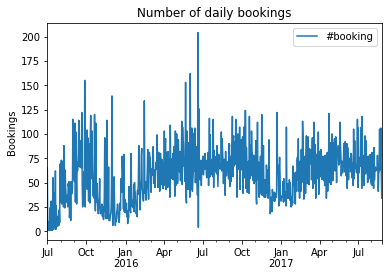

In [7]:
length = 788
x = np.array(df['city hotel'])
series = pd.DataFrame(data=x, index=pd.date_range(start=pd.datetime(2015, 7, 1), 
                                              periods=length,
                                                 freq='d'), 
                  columns=['#booking'])


series.plot()
plt.title("Number of daily bookings")
plt.ylabel('Bookings')

plt.savefig("Number of daily bookings.png")

Additive decomposition

In [4]:
result = seasonal_decompose(series, model='additive')
print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)

2015-07-01          NaN
2015-07-02          NaN
2015-07-03          NaN
2015-07-04    16.000000
2015-07-05     6.857143
                ...    
2017-08-22    72.571429
2017-08-23    70.714286
2017-08-24          NaN
2017-08-25          NaN
2017-08-26          NaN
Freq: D, Name: trend, Length: 788, dtype: float64


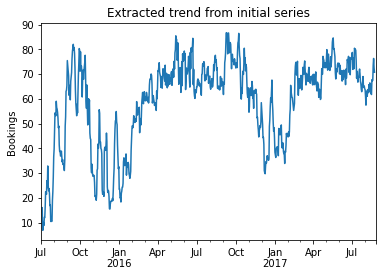

In [10]:
# trend
result = seasonal_decompose(series, model='additive')
result.trend.plot()

plt.title("Extracted trend from initial series")
plt.ylabel('Bookings')

plt.savefig("Extracted trend.png")

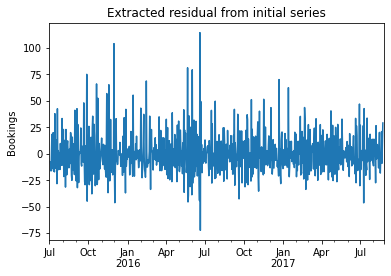

In [11]:
# residual component
result.resid.plot()

plt.title("Extracted residual from initial series")
plt.ylabel('Bookings')

plt.savefig("Extracted residual.png")

<AxesSubplot:>

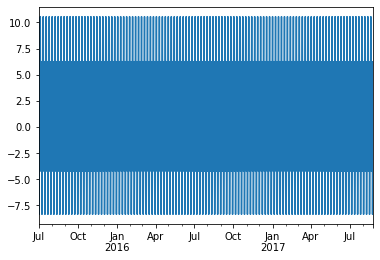

In [6]:
result.seasonal.plot()

Data extraction

In [9]:
result.trend.to_csv('trend_decomposed.csv', index=True)

In [10]:
result.resid.to_csv('resid_decomposed.csv', index=True)